In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, ClassifierMixin
import matplotlib.pyplot as plt

In [2]:

X_train = pd.read_csv('TinyMNIST/trainData.csv', header = None)
y_train = pd.read_csv('TinyMNIST/trainLabels.csv', header = None).values.flatten()
X_test = pd.read_csv('TinyMNIST/testData.csv', header = None)
y_test = pd.read_csv('TinyMNIST/testLabels.csv', header = None).values.flatten()

In [3]:
def FS(best_cols, select_history):
    best_cols = list(best_cols)
    remaining_cols = [col for col in X_train.columns if col not in best_cols]
    results = []
    for col in remaining_cols:
        new_cols = best_cols + [col]
        clf = MultinomialNB()
        clf = clf.fit(X_train[new_cols], y_train)
        results.append(clf.score(X_test[new_cols], y_test))
    best_idx = np.argmax(results)
    best_score = np.max(results)
    best_cols.append(remaining_cols[best_idx])
    select_history.append(remaining_cols[best_idx])
    
    return best_cols, best_score, select_history


In [8]:
def SBE(best_cols, blocked):
    best_cols = pd.Index(best_cols)
    final_results = []
    cols_history = []
    
    
    clf = MultinomialNB()
    clf = clf.fit(X_train[best_cols], y_train)
    final_results.append(clf.score(X_test[best_cols], y_test))
    cols_history.append(best_cols)

    for i in range(1, len(best_cols)):
        results = []
        for col in best_cols:
            if col == blocked:
                continue
            new_cols = best_cols.drop(col)
            clf = MultinomialNB()
            clf = clf.fit(X_train[new_cols], y_train)
            results.append(clf.score(X_test[new_cols], y_test))
        best_idx = np.argmax(results)
        best_cols = best_cols.drop(best_cols[best_idx])
        cols_history.append(best_cols)
        final_results.append(results[best_idx])
    best_idx = np.argmax(final_results)
    best_score = np.max(final_results)
    best_cols = cols_history[best_idx]    
    return best_cols, best_score


In [5]:
def all_same(items):
    return all(x == items[0] for x in items)

In [13]:
def SFFS():
    best_cols = []
    select_history = []
    fs_score_h = []
    sbe_score_h = []

    for i in range(196):
        best_cols, fs_best_score, select_history = FS(best_cols, select_history)
        fs_score_h.append(fs_best_score)
        print(len(best_cols), fs_best_score, end = ' - ')


        if (len(select_history) > 2) and (select_history[-1] == select_history[-2]):
            blocked = select_history[-1]
            print(select_history[-1], "was blocked!", end = ' ')
        else:
            blocked = -1

        best_cols, sbe_best_score = SBE(best_cols, blocked)
        sbe_score_h.append(sbe_best_score)
        print(len(best_cols), sbe_best_score)

        if (len(fs_score_h) > 10) and all_same(fs_score_h[-10:]):
            print("Same fs scores for 10 last iterations.")
            break

        if (len(sbe_score_h) > 10) and all_same(sbe_score_h[-10:]):
            print("Same sbe scores for 10 last iterations.")
            break
    return best_cols, sbe_score_h, fs_score_h

In [ ]:
%time best_cols, sbe_score_h, fs_score_h = SFFS()

Best Score: 0.8172
Best Indexes:
Int64Index([121,  74, 119,  63, 131, 104,  90,  79, 102,  48,  33,  54, 109,
             75,  49,  36, 106,  58,  18,  52,  78, 145, 138, 173, 142, 161,
             25, 150, 177,  22, 113,  24,  44, 179, 192,  92, 100,  77,  89,
            191,  96, 147, 172,  39,  20,  55, 171,  85,   0,   1,   2,   3],
           dtype='int64')


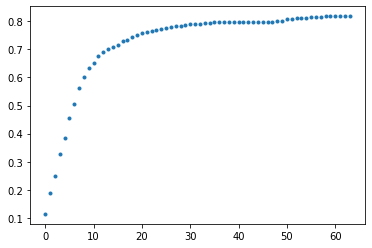

In [9]:
print("Best Score:", sbe_best_score)
print("Best Indexes:")
print(best_cols)
plt.plot(sbe_score_h[-1], '.')
